## Importing libraries and dataset

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.pipeline
import sklearn.neighbors as knn
import sklearn.ensemble as ens
import sklearn.naive_bayes as nba
from sklearn import svm

## Data
We decided to use a dataset about breast cancer. It is binary classified data with 30 features. Further information about the dataset can be found here: https://goo.gl/U2Uwz2

In code below the data is loaded and devided into training set and test set.

In [2]:
data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=111)

## Test function
Define a function for testing different classifiers. The function is called for all different classifiers to make comparison between classifiers simple. GridSearchCV is used to test different classifier parameters and choosing the one with the best results.

In [3]:
def testfunction(name,steps,parameters):

    pipeline = sklearn.pipeline.Pipeline(steps)
    cv = sklearn.model_selection.GridSearchCV(pipeline,
                                              param_grid=parameters)
    cv.fit(X_train, Y_train)
    y_predictions = cv.predict(X_test)
    report = sklearn.metrics.classification_report(Y_test, y_predictions)

    print(report)
    print("Train score (" + name + "):", cv.score(X_train, Y_train))
    print("Test score (" + name + "):", cv.score(X_test, Y_test))

    plt.figure(figsize=(1,1))
    plt.title("Confusion matrix")
    sns.heatmap(sklearn.metrics.confusion_matrix(Y_test, y_predictions), 
                annot=True, fmt="d")
    plt.show()

    plt.figure(figsize=(6,1))
    plt.title("Precision score")
    sns.barplot(sklearn.metrics.precision_score(Y_test, y_predictions, 
                                                average=None), 
                data.target_names)
    plt.show()

    plt.figure(figsize=(6,1))
    plt.title("Recall score")
    sns.barplot(sklearn.metrics.recall_score(Y_test, y_predictions, 
                                             average=None), 
                data.target_names)
    plt.show()

# k-nearest neighbors
The k-nearest-neighbours classifier tries to find k records in our train data that are most similar to a record we want to classify. With that approach the accuracy of our predictions is high, however, we found out that there exist beter classifiers for this dataset.

             precision    recall  f1-score   support

          0       0.95      0.89      0.92        44
          1       0.93      0.97      0.95        70

avg / total       0.94      0.94      0.94       114

Train score (kNearestNeighbours): 0.940659340659
Test score (kNearestNeighbours): 0.938596491228


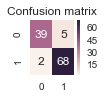

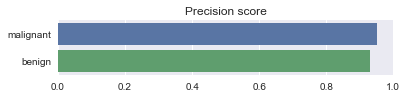

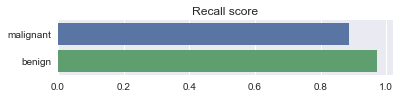

In [4]:
def kNeighbours():
    classifier = knn.KNeighborsClassifier()

    ktable = [1,3,5,6,7,8,9]
    steps = [('classifier', classifier)]

    parameters = dict(classifier__n_neighbors = ktable)

    testfunction("kNearestNeighbours",steps,parameters)

kNeighbours();

# SVM
Linear Support Vector Machine seems to give slightly better results than non-linear (rbf and sigmoid) approaches. Accuracy achieved is equal to 95%

             precision    recall  f1-score   support

          0       0.95      0.93      0.94        44
          1       0.96      0.97      0.96        70

avg / total       0.96      0.96      0.96       114

Train score (SVM): 0.962637362637
Test score (SVM): 0.956140350877


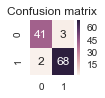

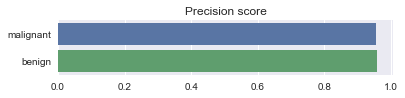

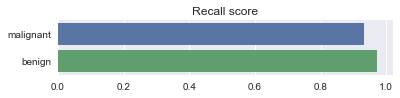

In [5]:
def SVM():
    classifier = svm.SVC()

    steps = [('classifier', classifier)]

    parameters = dict(classifier__kernel=["sigmoid", "rbf","linear"],
                      classifier__decision_function_shape=["ovo", "ovr"],
                      classifier__gamma=[0.001, 0.5, 0.2, 0.02, 0.002, "auto"],
                      classifier__coef0=[0.001, 0.01, 0.1, 0.3, 0.0])

    testfunction("SVM",steps, parameters)
   
SVM();

# Bagging
Classifying using bagging (splitting the train set into more not necessarily disjoint sets and training multiple classifiers) seems to give the best results for selected dataset.

             precision    recall  f1-score   support

          0       0.98      0.95      0.97        44
          1       0.97      0.99      0.98        70

avg / total       0.97      0.97      0.97       114

Train score (bagging): 1.0
Test score (bagging): 0.973684210526


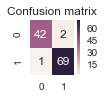

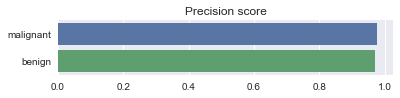

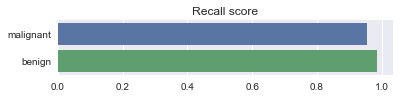

In [6]:
def bagging():
    classifier = ens.BaggingClassifier();

    ntable = [7,13,21]
    max_samples = max_features = [0.10,0.25,0.35,0.60]
    bootstrap_features = bootstrap = [True, False]
    steps = [('classifier', classifier)]

    parameters = dict(classifier__n_estimators = ntable,
                      classifier__max_samples = max_samples,
                      classifier__max_features = max_features,
                      classifier__bootstrap_features = bootstrap_features,
                      classifier__bootstrap = bootstrap)

    testfunction("bagging",steps,parameters)
    
bagging();

# Naive Bayes
Scikit-learn provides different approaches of Naive Bayes. Below Multinomial Naive Bayes and Gaussian Naive Bayes are used.

## Multinomial Naive Bayes
Multinomial Naive Bayes was the one used also in homework 2. Alpha is the m in m-estimate that was introduced in the lecture slides. Using Multinomial Naive Bayes a test score of 89% can be achieved. That makes it the weakest classifier for this data.

             precision    recall  f1-score   support

          0       0.94      0.77      0.85        44
          1       0.87      0.97      0.92        70

avg / total       0.90      0.89      0.89       114

Train score (NaiveBayes): 0.896703296703
Test score (NaiveBayes): 0.894736842105


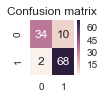

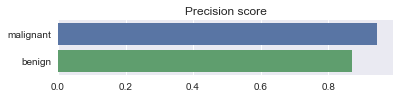

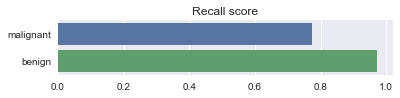

In [7]:
def multiNomialNB():
    classifier = nba.MultinomialNB()
    
    alphas = [0.0, 0.4, 0.8, 1.0, 1.4, 2.0, 2.8, 4.0, 5.0]
    
    steps = [('classifier', classifier)]
    parameters = dict(classifier__alpha = alphas)

    testfunction("NaiveBayes",steps,parameters)


multiNomialNB();

## Gaussian Naive Bayes
Another Naive Bayes approach is called Gaussian NB which uses normal distribution. There aren't any parameters whose values should be varied. Gaussian NB achieves a score of 94% which is quite the same as for k-nearest neighbors classifier.

             precision    recall  f1-score   support

          0       0.91      0.95      0.93        44
          1       0.97      0.94      0.96        70

avg / total       0.95      0.95      0.95       114

Train score (NaiveBayes): 0.936263736264
Test score (NaiveBayes): 0.947368421053


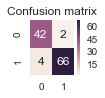

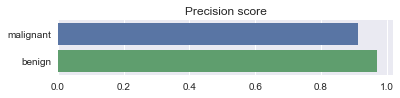

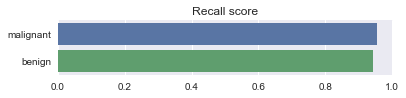

In [8]:
def gaussianNB():
    classifier = nba.GaussianNB()
    
    steps = [('classifier', classifier)]
    parameters = dict()

    testfunction("NaiveBayes",steps,parameters)


gaussianNB();